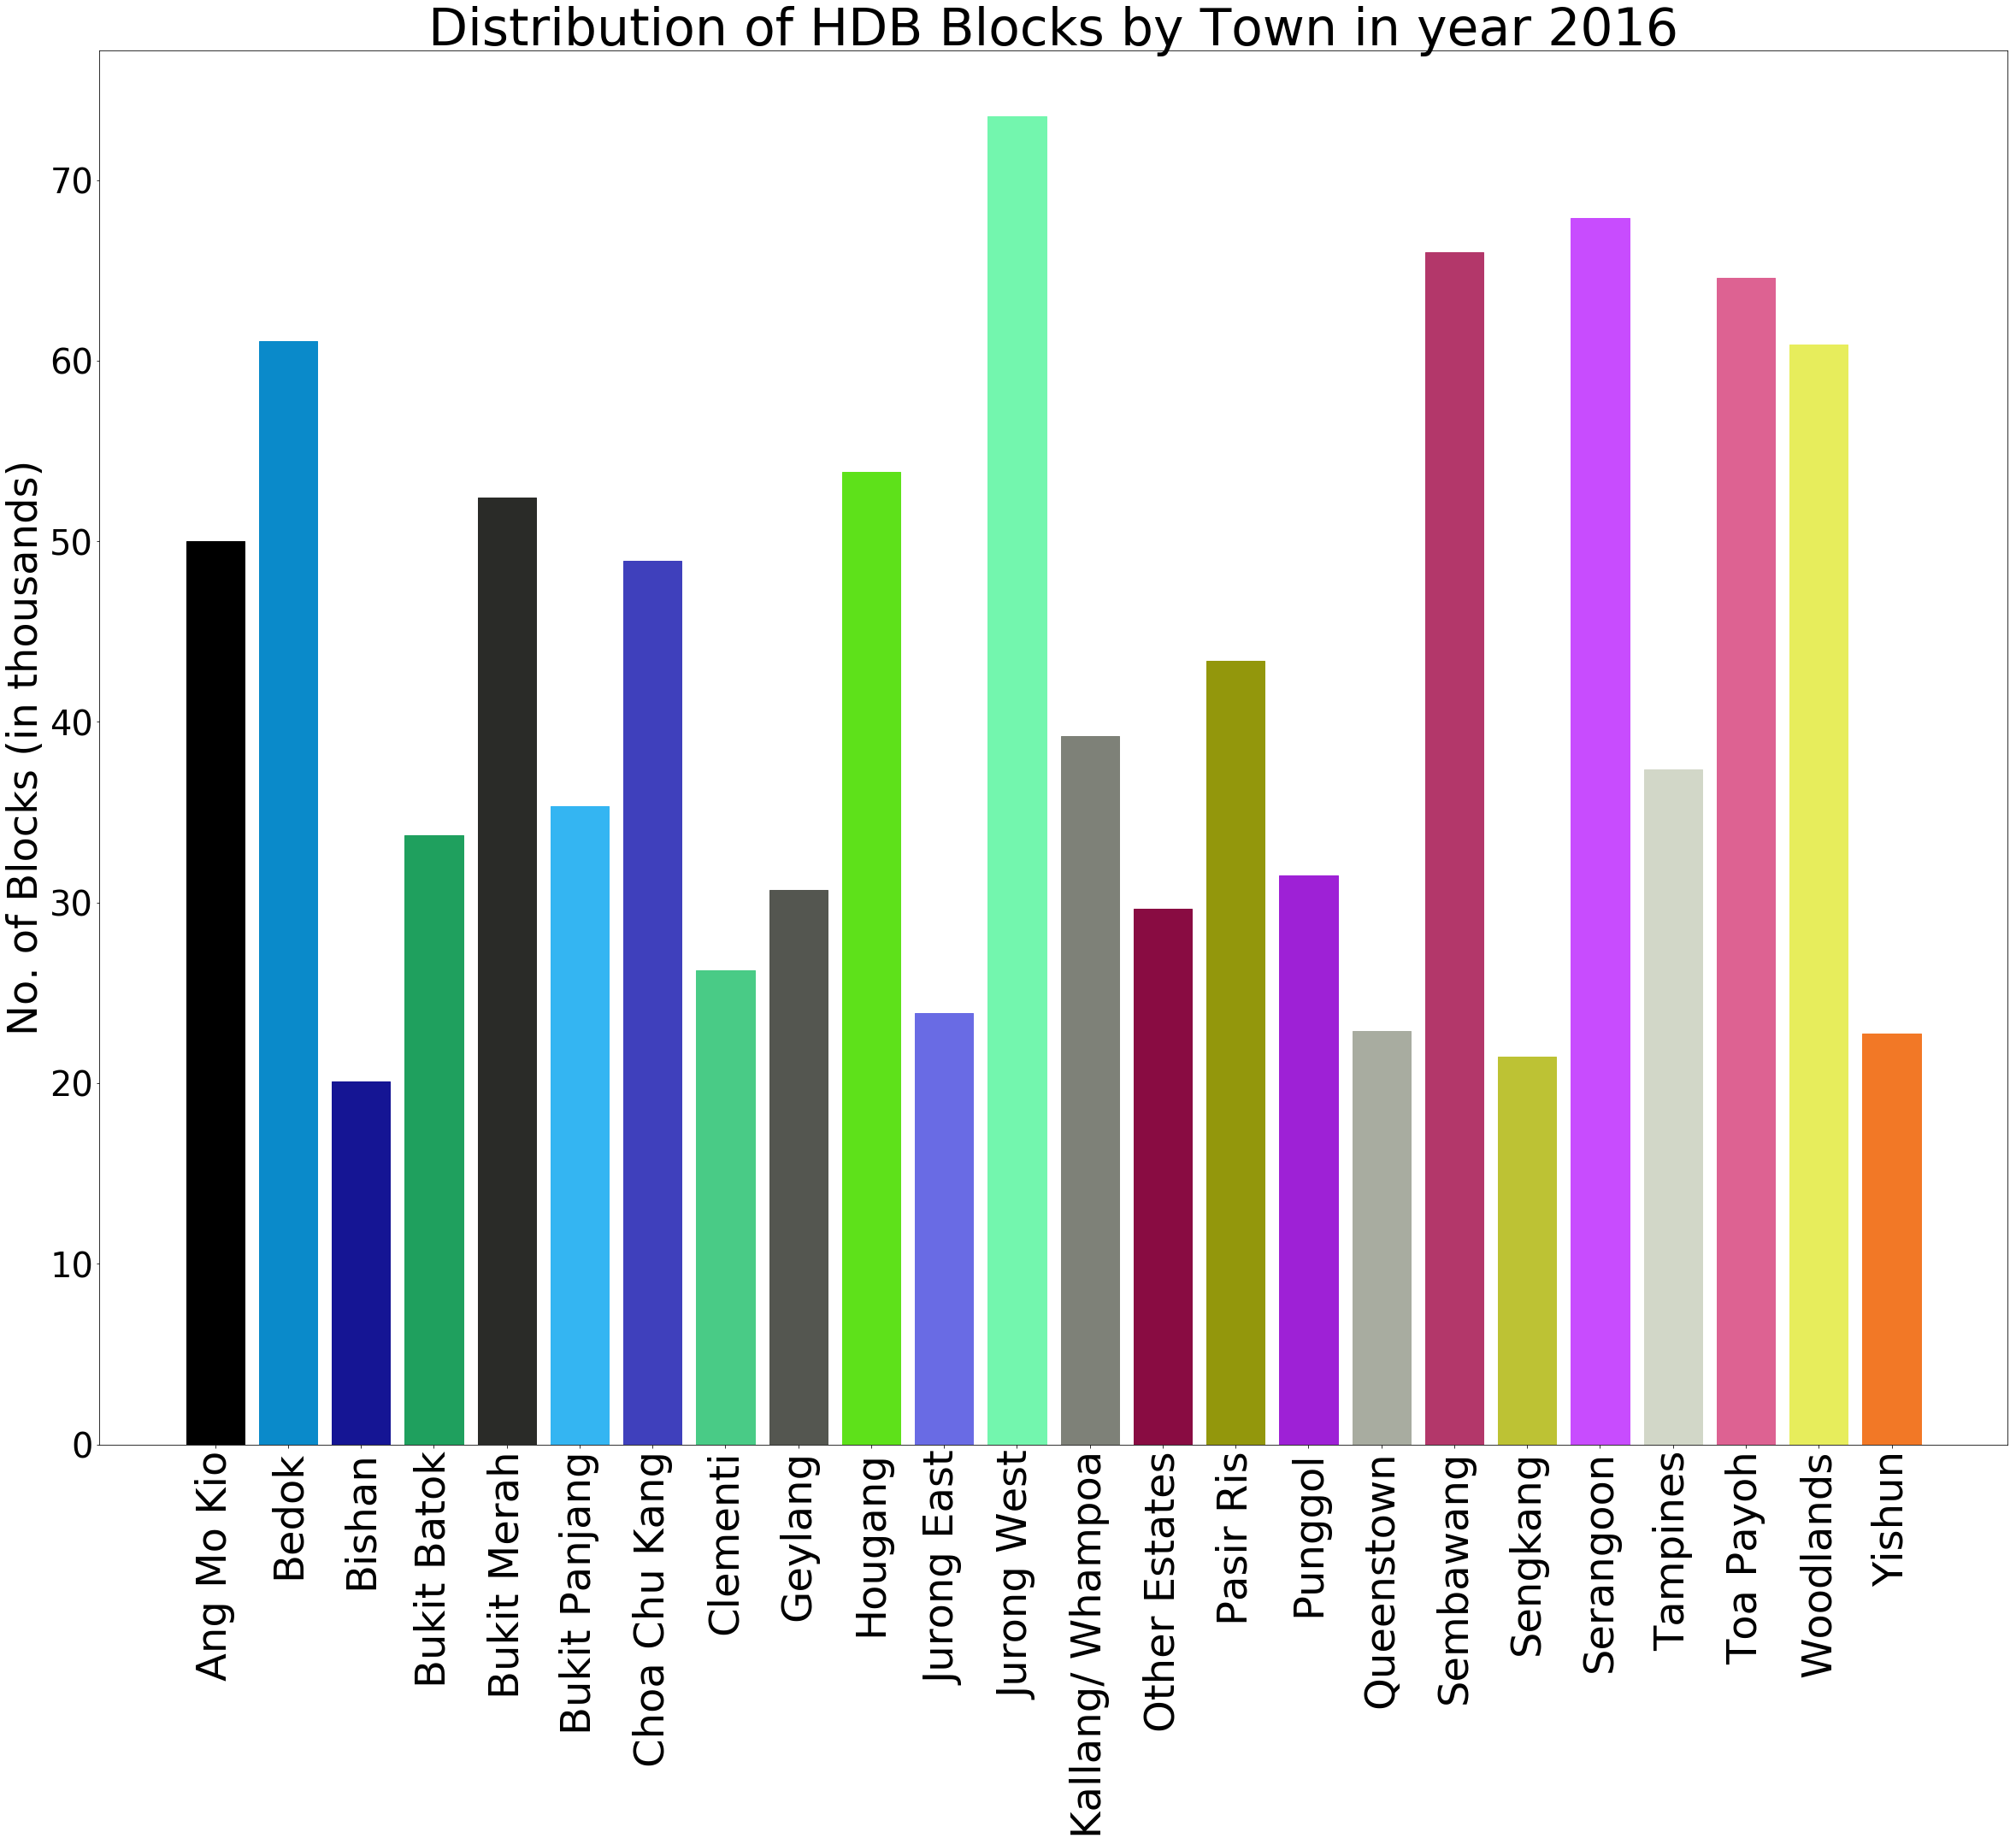

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fname = "land-area-and-dwelling-units-by-town\land-area-and-dwelling-units-by-town.csv"
db = np.genfromtxt(fname,skip_header=1,dtype=[('year','i4'),
                                              ('town','U30'),
                                              ('total_land_area','i8'),
                                              ('residential_land_area','i8'),
                                              ('current_dwellings','i8'),
                                              ('max_planned_dwellings','i8')],delimiter=",")
# functions to filter by_town and by_year
def by_town(town):
    bool_idx = (db['town']==town)                 
    return bool_idx
def by_year(year):
    bool_idx = (db['year']==year)
    return bool_idx
def get_colors(n):    # generate n different colors
    max_value = 255**3
    interval = int(max_value / n)
    colors = [hex(i)[2:].zfill(6) for i in range(0,max_value,interval)]
    return colors 

# use of list(set()) to filter unique List of Town & Year
Town_List = list(set(db['town']))   
Town_List.sort()
Year_List = list(set(db['year']))
Year_List.sort()

# 
db_extracted = db[by_year(2016)]
# for num, record in enumerate(extracted_db):
#     print(record['town'],record['current_dwellings'])

Current_Dwellings = db_extracted['current_dwellings']

colors = get_colors(len(Town_List))

fig = plt.subplots(figsize=(40,30))
ind = np.arange(1,len(Town_List)+1)
barlist = plt.bar(ind,Current_Dwellings*0.001)
for i in np.arange(len(barlist)):
    barlist[i].set_color("#"+str(colors[i]))
plt.xticks(ind,Town_List,rotation='vertical',fontsize=48)
plt.yticks(fontsize=40)
plt.ylabel("No. of Blocks (in thousands)",fontsize=48)
plt.title("Distribution of HDB Blocks by Town in year 2016",fontsize=60)
plt.show()

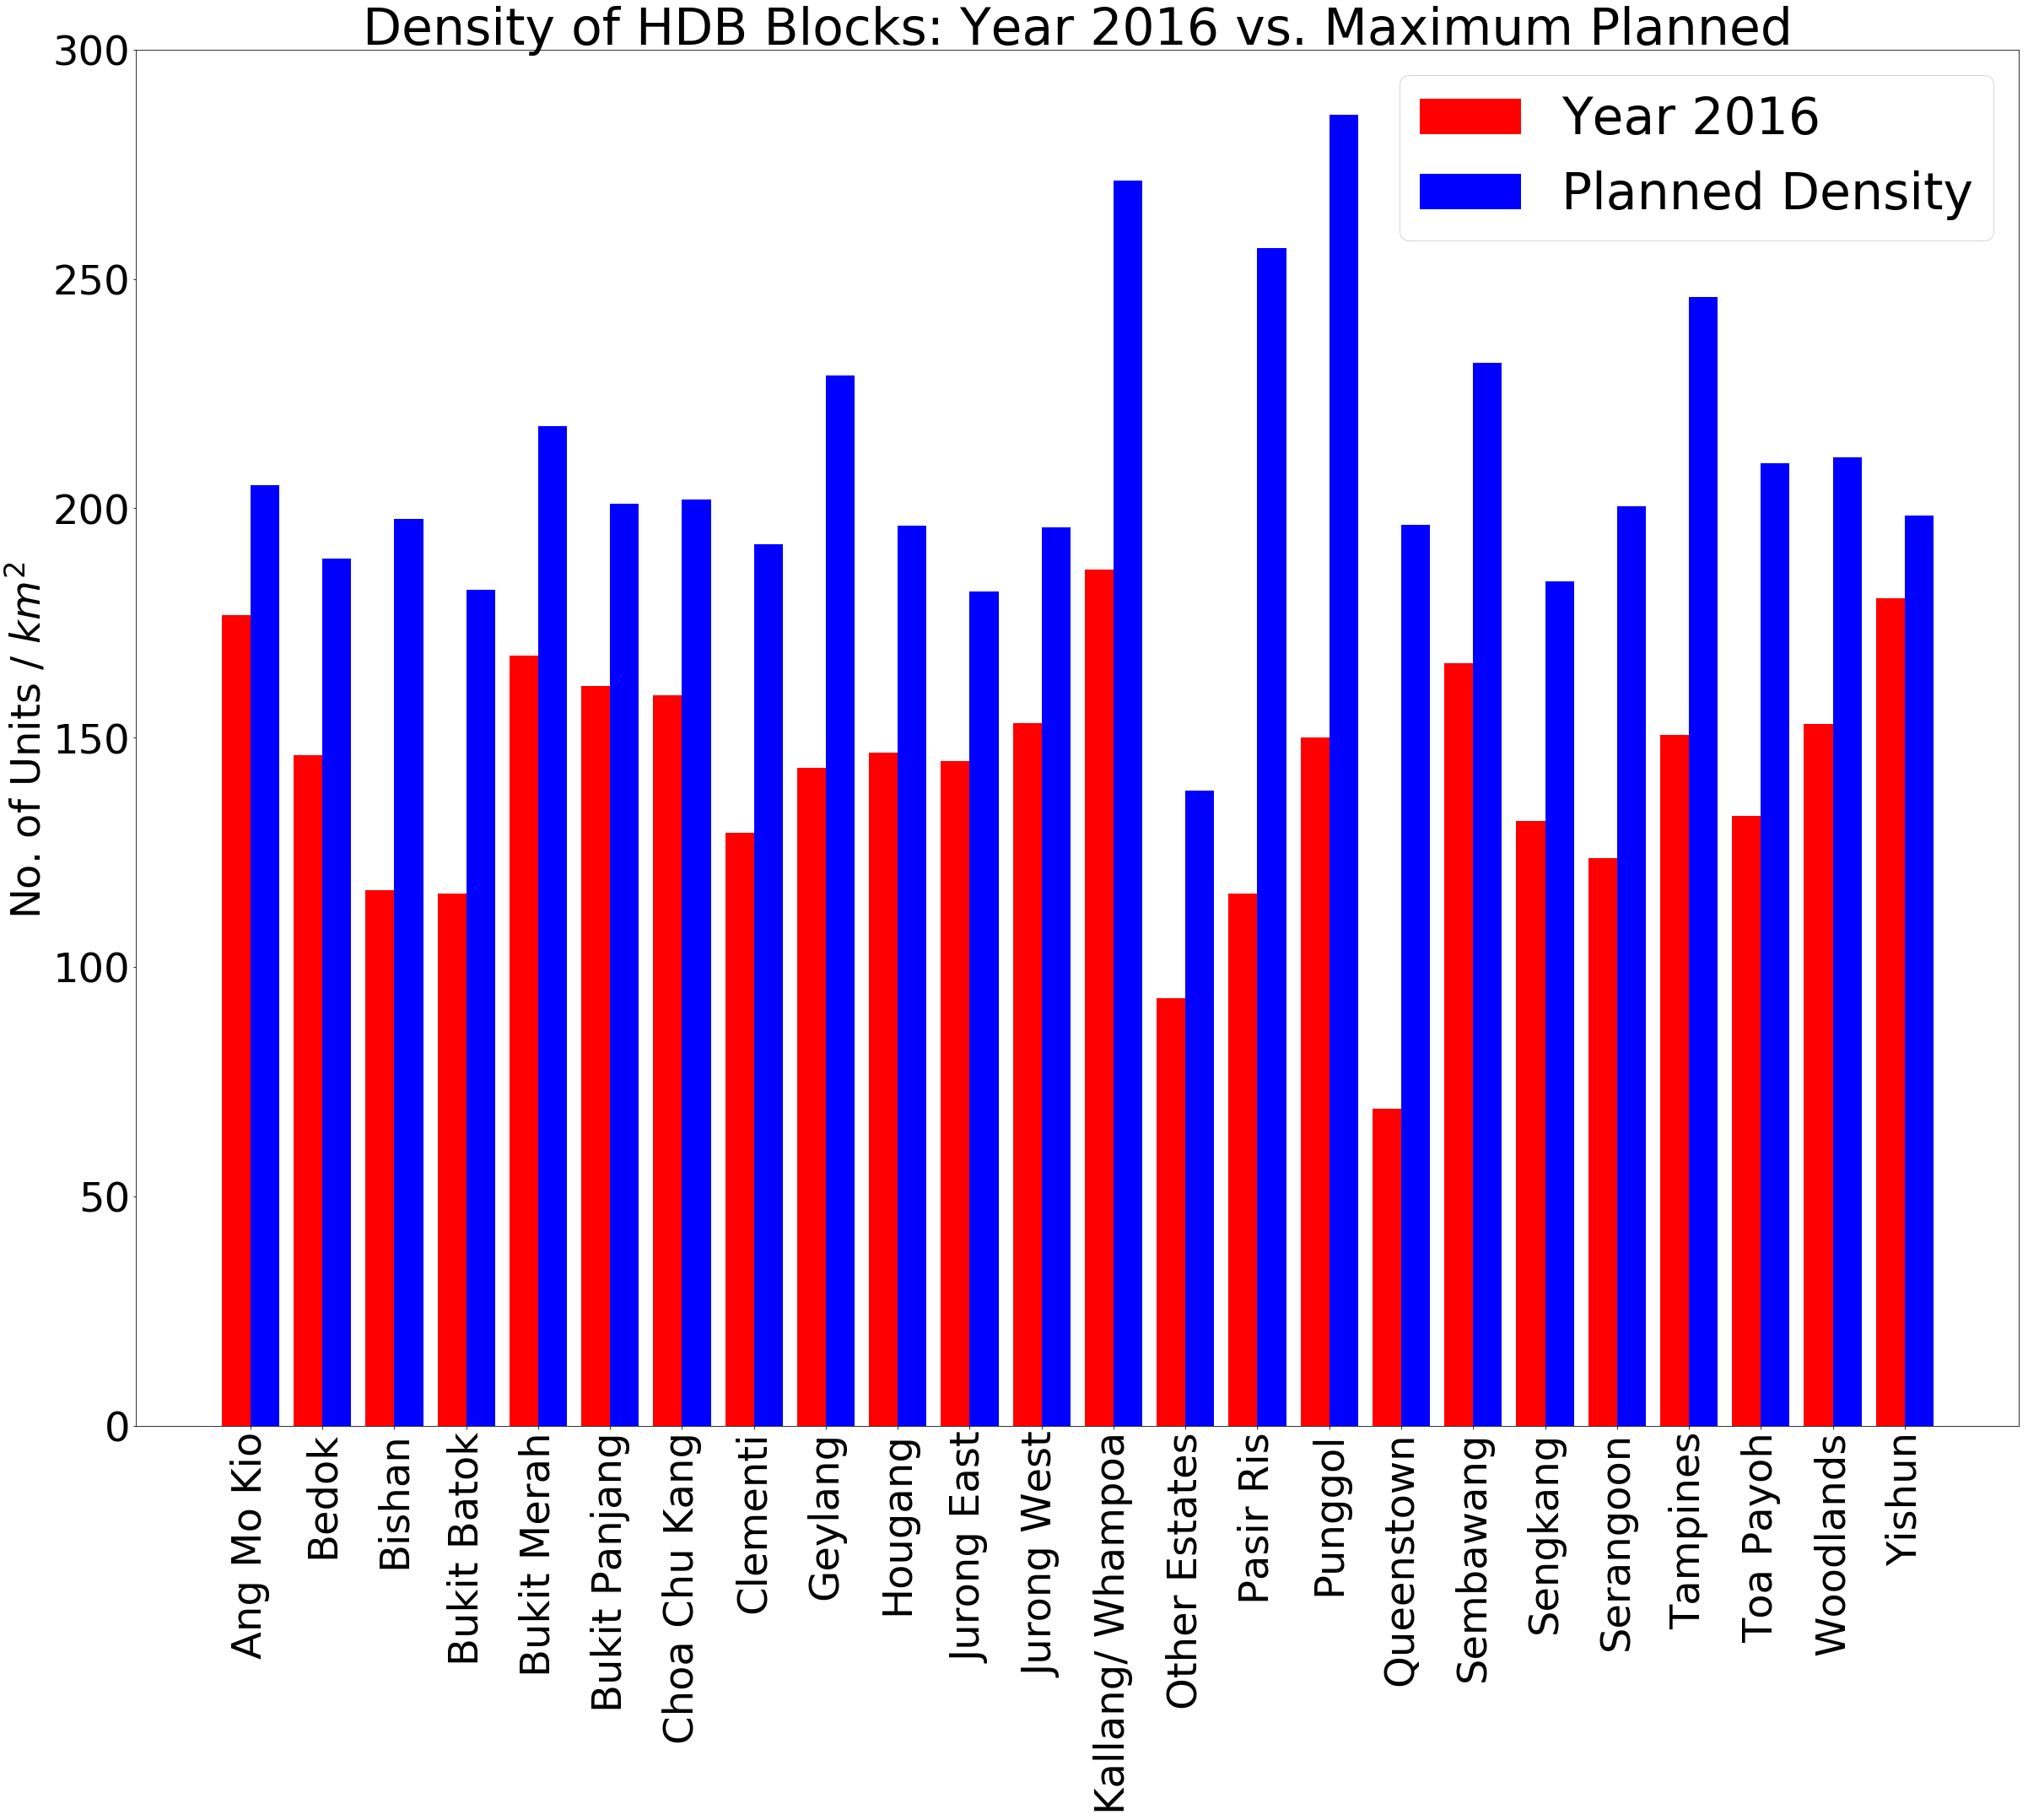

In [3]:
Total_Land_Area = db_extracted['total_land_area']
Residential_Land_Area = db_extracted['residential_land_area']
Max_Planned_Dwellings = db_extracted['max_planned_dwellings']

Percentage_Residential_Area = (Residential_Land_Area / Total_Land_Area) *100
Current_Density = (Current_Dwellings / Residential_Land_Area)
Planned_Density = (Max_Planned_Dwellings / Residential_Land_Area)

fig = plt.subplots(figsize=(40,30))
ind = np.arange(1,len(Town_List)+1)
width = 0.4
p1 = plt.bar(ind,Current_Density,width,color='r')
p2 = plt.bar(ind+width,Planned_Density,width,color='b')
plt.xticks(ind+0.5*width,Town_List,rotation='vertical',fontsize=48)
plt.yticks(fontsize=48)
plt.ylabel("No. of Units / $km^2$ ",fontsize=48)
plt.title("Density of HDB Blocks: Year 2016 vs. Maximum Planned",fontsize=60)
plt.legend(('Year 2016', 'Planned Density'), fontsize = 60)
plt.show()

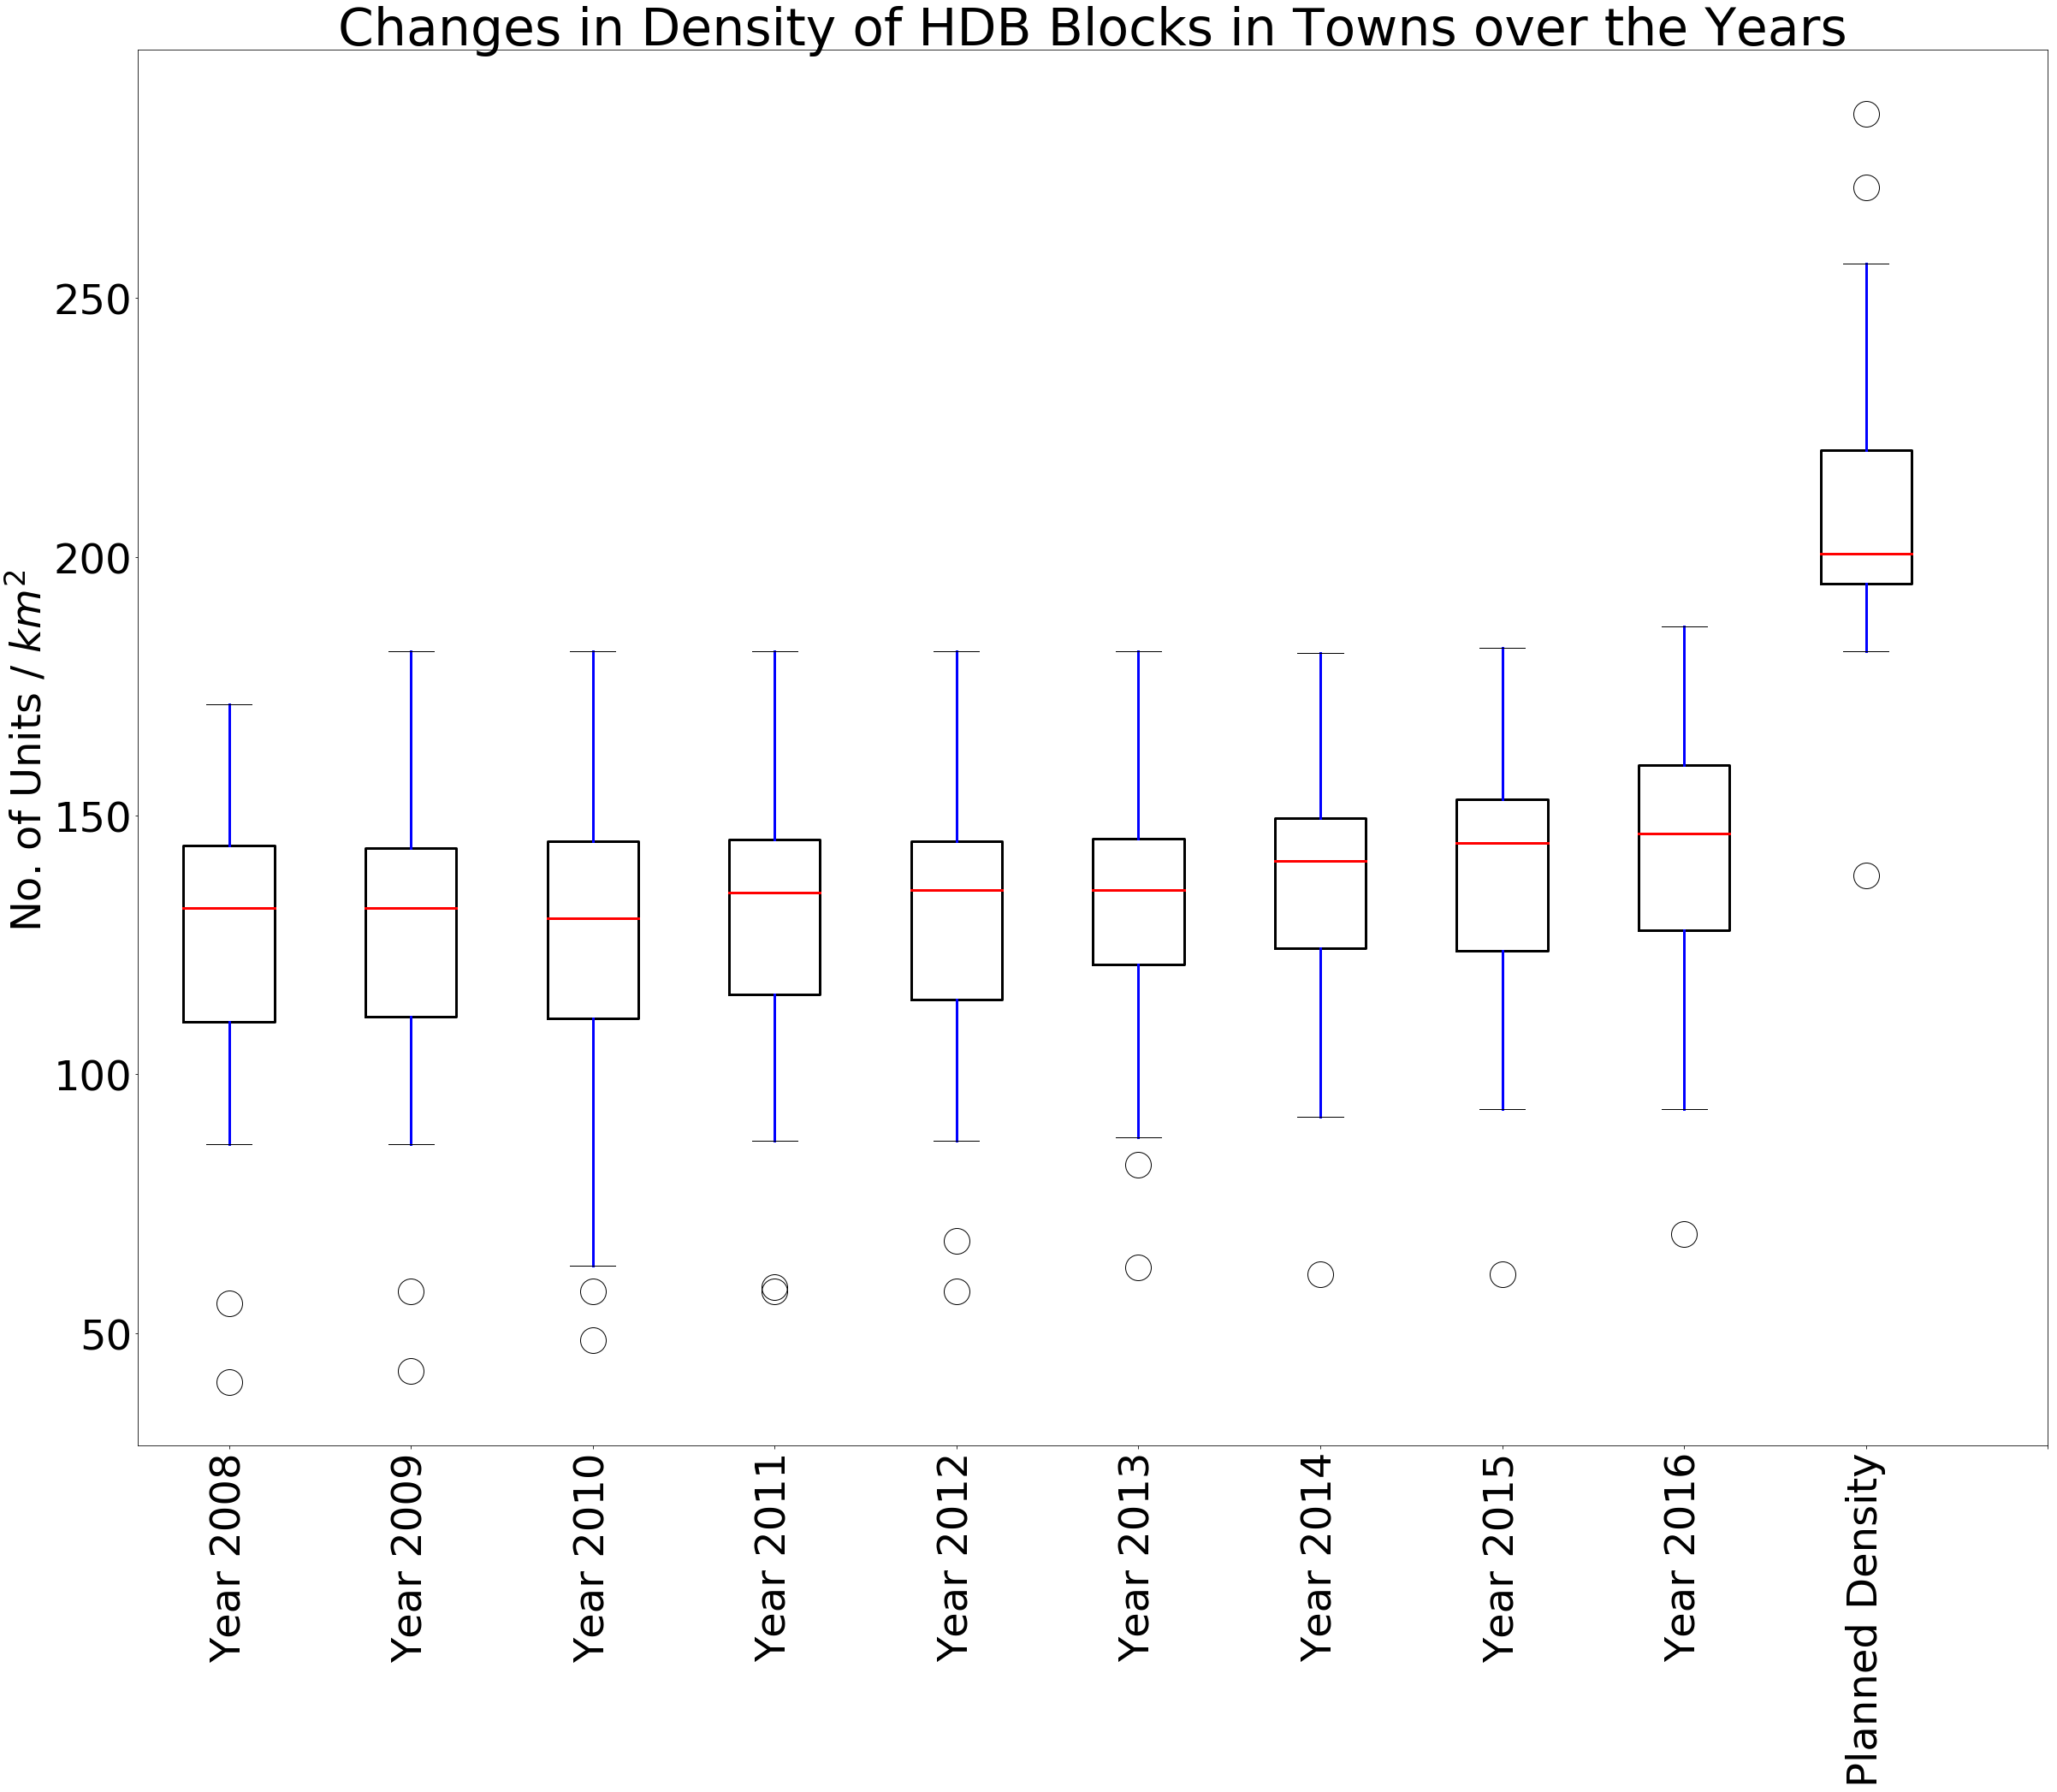

In [5]:
Data_List = []
X_Axis_List = []
for year in Year_List:
    db_extracted = db[by_year(year)]
    Current_Dwellings = db_extracted['current_dwellings']
    Residential_Land_Area = db_extracted['residential_land_area']
    Current_Density = (Current_Dwellings / Residential_Land_Area)
    Data_List.append(Current_Density)
    X_Axis_List.append("Year "+str(year))

Data_List.append(Planned_Density)
X_Axis_List.append('Planned Density')
ind = np.arange(1,len(X_Axis_List)+2)

fig,ax1 = plt.subplots(figsize=(40,30))
bp = ax1.boxplot(Data_List, notch=0, sym="+", vert=1, whis=1.5)

plt.setp(bp['boxes'],color='black',linewidth=3)
plt.setp(bp['whiskers'],color='blue',linewidth=3)
plt.setp(bp['fliers'],color='black',marker="o",alpha=2,markersize=30,linewidth=4)
plt.setp(bp['medians'],color='red',linewidth=3)

plt.xticks(ind,X_Axis_List,rotation='vertical',fontsize=48)
plt.yticks(fontsize=48)
plt.ylabel("No. of Units / $km^2$ ",fontsize=48)
plt.title("Changes in Density of HDB Blocks in Towns over the Years",fontsize=60)

plt.show()